<a href="https://colab.research.google.com/github/arabio-arab/Smart-Waste-Sorting-System/blob/main/resnet_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow. keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
IMAGE_SIZE = [224,224]
myResnet = ResNet50 (input_shape=IMAGE_SIZE + [3], weights="imagenet", include_top=False)
# print (myResnet. summary())


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
trainMyImagesFolder = "/content/drive/MyDrive/dataset_3/Train"
testMyImagesFolder="/content/drive/MyDrive/dataset_3/Val"

In [3]:
# freeze the weights
for layer in myResnet.layers:
  layer.trainable = True
Classes=glob('/content/drive/MyDrive/dataset_3/Train/*')
print(Classes)
numOfClasses = len(Classes)

['/content/drive/MyDrive/dataset_3/Train/G', '/content/drive/MyDrive/dataset_3/Train/NG']


In [4]:
# build the model
global_avg_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(myResnet.output)
PlusFlattenLayer = Flatten()(global_avg_pooling_layer)
# add the last layer
predictionLayer = Dense (numOfClasses, activation='softmax') (PlusFlattenLayer)
model = Model (inputs=myResnet.input,outputs=predictionLayer)
# print (model.summary())

In [5]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])


In [6]:
# data augmentation
train_datagen = ImageDataGenerator (rescale = 1./255,
                                      shear_range = 0.2,
                                      zoom_range = 0.2,
                                      horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(trainMyImagesFolder,
                                                    target_size = (224,224),
                                                    batch_size=32,
                                                    class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(testMyImagesFolder,
                                              target_size = (224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

Found 21 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


In [13]:
EPOCHS = 22
best_model_file = 'predator-model.h5'
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau ,EarlyStopping
callbacks = [
              ModelCheckpoint(best_model_file, verbose=1 ,save_best_only=True, monitor= 'val_accuracy'),
              ReduceLROnPlateau(monitor= 'val_accuracy', patience=10, factor=0.1, verbose=1, min_lr=1e-6),
              EarlyStopping(monitor= 'val_accuracy', patience=30, verbose=1) ]


In [14]:
# train
r = model.fit(
              training_set,
              validation_data = test_set,
              epochs=EPOCHS,
              steps_per_epoch=len(training_set),
              validation_steps=len(test_set),
              callbacks=callbacks )
# print the best validation accuracy
best_val_acc = max(r.history['val_accuracy'])
print (f"Best validation Accuracy: {best_val_acc}")

Epoch 1/22
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 786ms/step - accuracy: 0.6190 - loss: 0.5522
Epoch 1: val_accuracy improved from -inf to 0.57143, saving model to predator-model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6190 - loss: 0.5522 - val_accuracy: 0.5714 - val_loss: 240521344.0000 - learning_rate: 1.0000e-06
Epoch 2/22
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5714 - loss: 0.6342
Epoch 2: val_accuracy did not improve from 0.57143
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5714 - loss: 0.6342 - val_accuracy: 0.5714 - val_loss: 183901136.0000 - learning_rate: 1.0000e-06
Epoch 3/22
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 737ms/step - accuracy: 0.5714 - loss: 0.5696
Epoch 3: val_accuracy did not improve from 0.57143
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5714 - loss: 0.5696 - val_accuracy: 0.5714 - val_loss: 141334864.0000 - learning_rate: 1.0000e-06
Epoch 4/22
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 738ms/step - accuracy: 0.6190 - loss: 0.6002
Epoch 4: val_accuracy did not improve from 0.57143
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6190 - loss: 0.6002 - val_accuracy: 0.5714 - val_loss: 110074928.0000 - learning_rate: 1.0000e-06
Epoch 

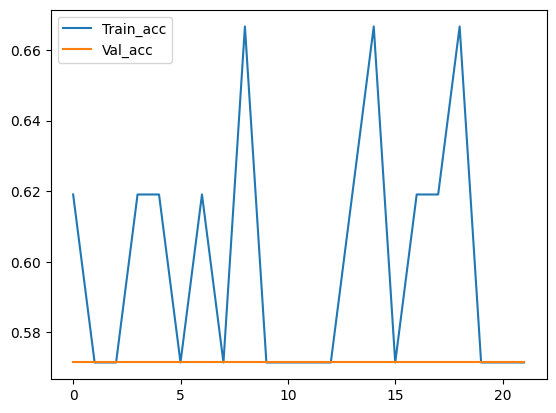

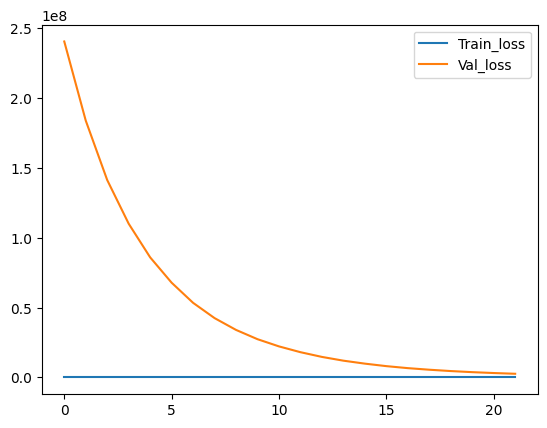

In [15]:
# plot the results history
plt.plot(r.history['accuracy'], label='Train_acc')
plt.plot(r.history['val_accuracy'], label='Val_acc')
plt.legend()
plt.show()
plt.plot(r.history['loss'], label='Train_loss')
plt.plot(r.history['val_loss'], label='Val_loss')
plt.legend()
plt.show()